## Clustering Demonstration
We will use k-means clustering to show how clustering works, though several other clustering methods exist. The key hyper-parameter associated with k-means is the value $k$ which specifies the number of clusters.

In [15]:
import numpy as np
from scipy.io import loadmat
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
%matplotlib inline

#### Simple k-Means Demo
We first generate some data with four known clusters

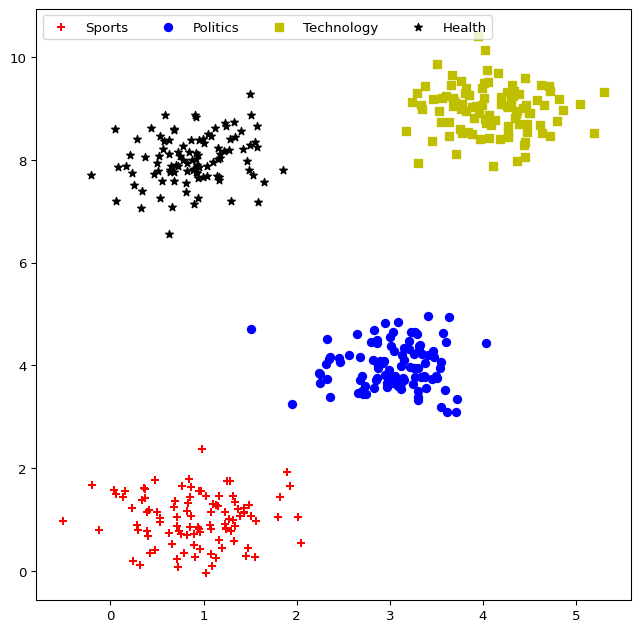

In [16]:
sigma = np.array([[0.2,0],[0,0.2]])
n = 100
mu1 = np.array([1,1])
mu2 = np.array([3,4])
mu3 = np.array([4,9])
mu4 = np.array([1,8])
x11 = np.random.multivariate_normal(mu1,sigma,n)
x15 = np.random.multivariate_normal(mu2,sigma,n)
x51 = np.random.multivariate_normal(mu3,sigma,n)
x55 = np.random.multivariate_normal(mu4,sigma,n)

X = np.vstack([x11,x15,x51,x55])
y = np.zeros([4*n,1])
y[n:2*n] = 1
y[2*n:3*n] = 2
y[3*n:4*n] = 3
fig = plt.figure(num=None, figsize=(8, 8), dpi=96, facecolor='w', edgecolor='k')
plt.scatter(X[np.where(y == 0)[0],0],X[np.where(y == 0)[0],1],c='r',marker='+')
plt.scatter(X[np.where(y == 1)[0],0],X[np.where(y == 1)[0],1],c='b',marker='o')
plt.scatter(X[np.where(y == 2)[0],0],X[np.where(y == 2)[0],1],c='y',marker='s')
plt.scatter(X[np.where(y == 3)[0],0],X[np.where(y == 3)[0],1],c='k',marker='*')

plt.legend(['Sports','Politics','Technology','Health'],ncol=4,loc=2)

Stack all data together and select four random cluster centers

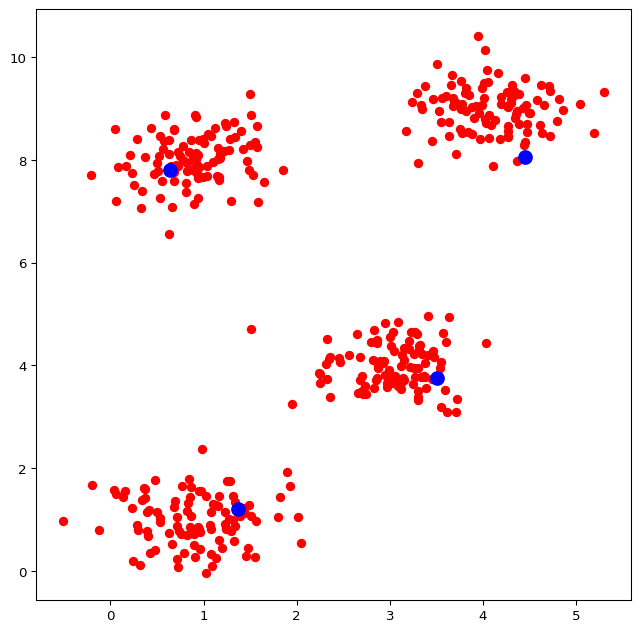

In [17]:
np.random.seed(421)
k = 4
r = np.random.permutation(X.shape[0])
init_centroids = X[r[0:k],:]
fig = plt.figure(num=None, figsize=(8, 8), dpi=96, facecolor='w', edgecolor='k')
plt.scatter(X[:,0],X[:,1],c='r')
plt.scatter(init_centroids[:,0],init_centroids[:,1],c='b',marker='o',s=100)


Assign points to the closest cluster and recompute centroids. Iterate until converged. Notice how quickly k-means converges regardless of the initial conditions. However, this might not always be true.

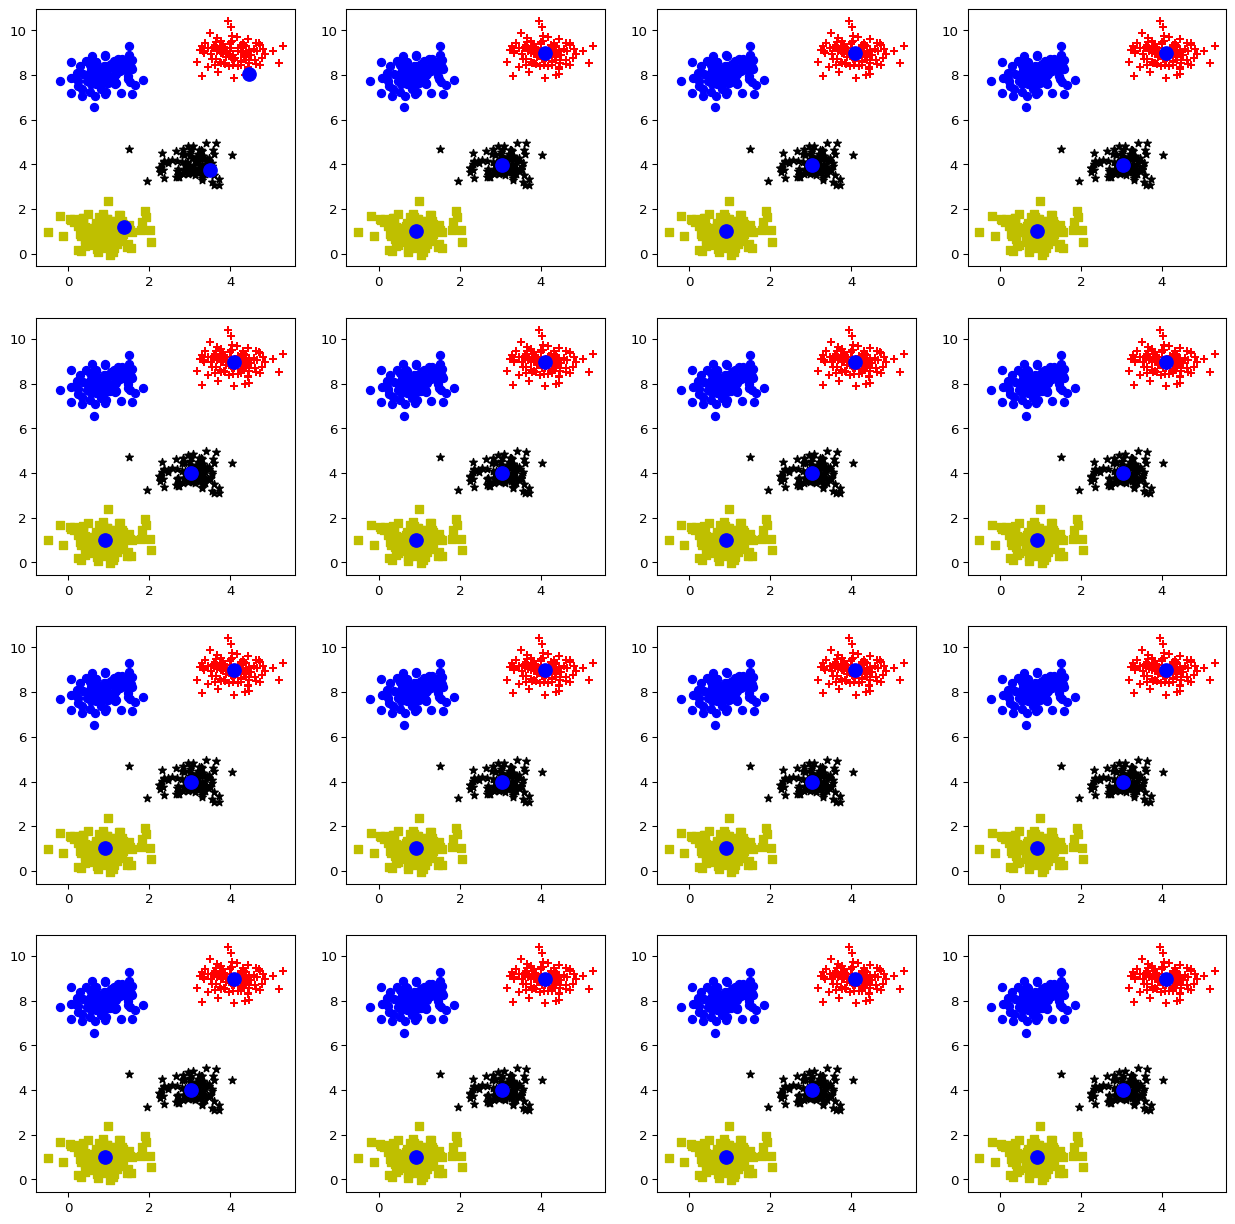

In [18]:
centroids = init_centroids
fig = plt.figure(num=None, figsize=(16, 16), dpi=96, facecolor='w', edgecolor='k')
for iters in range(16):
    distances = np.zeros((X.shape[0],k))
    for i in range(k):
        for j in range(X.shape[0]):
            distances[j,i] = np.sqrt(np.sum((X[j,:] - centroids[i,:])**2))
    assigned_cluster = np.argmin(distances,axis=1) 
    ax = fig.add_subplot(4,4,iters+1)

    ax.scatter(X[np.where(assigned_cluster == 0)[0],0],X[np.where(assigned_cluster == 0)[0],1],c='r',marker='+')
    ax.scatter(X[np.where(assigned_cluster == 1)[0],0],X[np.where(assigned_cluster == 1)[0],1],c='b',marker='o')
    ax.scatter(X[np.where(assigned_cluster == 2)[0],0],X[np.where(assigned_cluster == 2)[0],1],c='y',marker='s')
    ax.scatter(X[np.where(assigned_cluster == 3)[0],0],X[np.where(assigned_cluster == 3)[0],1],c='k',marker='*')
    ax.scatter(centroids[:,0],centroids[:,1],c='b',marker='o',s=100)

    # recompute centroids
    for i in range(k):
        centroids[i,:] = np.mean(X[np.where(assigned_cluster == i)[0],:],axis=0)


Original Initialization Convergence Details:
Run 1: Converged in 6 iterations
Run 2: Converged in 3 iterations
Run 3: Converged in 5 iterations
Run 4: Converged in 5 iterations
Run 5: Converged in 5 iterations
Run 6: Converged in 6 iterations
Run 7: Converged in 5 iterations
Run 8: Converged in 4 iterations
Run 9: Converged in 4 iterations
Run 10: Converged in 6 iterations
Original Code Average Iterations: 4.9

Centroids have been saved to 'centroids_original.npy'

Original Centroids for each run:
Run 1 Centroids:
[[3.03680497 3.99359579]
 [0.88718209 8.00958215]
 [0.91532972 1.01136904]
 [4.09179975 8.96938239]]
Run 2 Centroids:
[[0.88718209 8.00958215]
 [0.91532972 1.01136904]
 [4.09179975 8.96938239]
 [3.03680497 3.99359579]]
Run 3 Centroids:
[[1.97606735 2.50248242]
 [1.04636326 8.41316867]
 [4.09179975 8.96938239]
 [0.75694295 7.67937501]]
Run 4 Centroids:
[[0.49487256 1.16890787]
 [1.25934013 0.88247363]
 [3.03680497 3.99359579]
 [2.48949092 8.48948227]]
Run 5 Centroids:
[[3.036

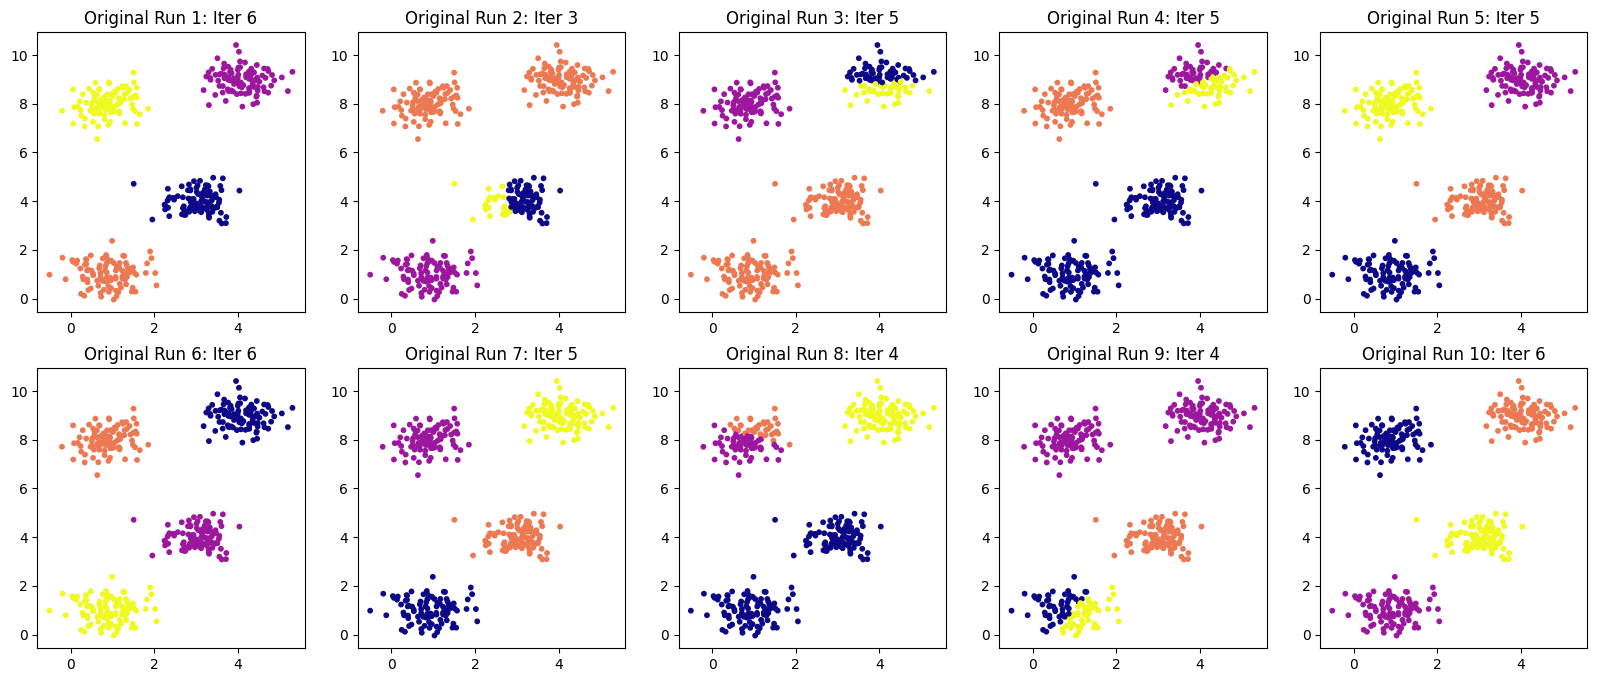

In [33]:
iterations_original = []
convergence_runs_original = []
centroids_original = []

for run in range(10):
    random_centroids = X[np.random.choice(X.shape[0], 4, replace=False)]
    kmeans = KMeans(n_clusters=4, init=random_centroids, n_init=1, max_iter=16, random_state=run)
    kmeans.fit(X)
    iterations_original.append(kmeans.n_iter_)
    convergence_runs_original.append((run + 1, kmeans.n_iter_))
    centroids_original.append(kmeans.cluster_centers_)

print("\nOriginal Initialization Convergence Details:")
for run, iteration in convergence_runs_original:
    print(f"Run {run}: Converged in {iteration} iterations")
print("Original Code Average Iterations:", np.mean(iterations_original))

# Plot
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()
for i, (run, iteration) in enumerate(convergence_runs_original):
    kmeans = KMeans(n_clusters=4, init='random', n_init=1, max_iter=iteration, random_state=run)
    kmeans.fit(X)
    labels = kmeans.labels_
    ax = axes[i]
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', s=10)
    ax.set_title(f'Original Run {run}: Iter {iteration}')

centroids_original = np.array(centroids_original)
np.save('centroids_original.npy', centroids_original) 
print("\nCentroids have been saved to 'centroids_original.npy'")
print("\nOriginal Centroids for each run:")
for i, centroids in enumerate(centroids_original):
    print(f"Run {i + 1} Centroids:\n{centroids}")



Modified Initialization Convergence Details:
Run 1: Converged in 3 iterations
Run 2: Converged in 2 iterations
Run 3: Converged in 3 iterations
Run 4: Converged in 2 iterations
Run 5: Converged in 2 iterations
Run 6: Converged in 2 iterations
Run 7: Converged in 3 iterations
Run 8: Converged in 3 iterations
Run 9: Converged in 2 iterations
Run 10: Converged in 3 iterations
Modified Code Average Iterations: 2.5

Centroids have been saved to 'centroids_modified.npy'

Modified Centroids for each run:
Run 1 Centroids:
[[0.91532972 1.01136904]
 [4.09179975 8.96938239]
 [0.88718209 8.00958215]
 [3.03680497 3.99359579]]
Run 2 Centroids:
[[3.03680497 3.99359579]
 [4.09179975 8.96938239]
 [0.91532972 1.01136904]
 [0.88718209 8.00958215]]
Run 3 Centroids:
[[3.03680497 3.99359579]
 [4.09179975 8.96938239]
 [0.88718209 8.00958215]
 [0.91532972 1.01136904]]
Run 4 Centroids:
[[3.03680497 3.99359579]
 [4.09179975 8.96938239]
 [0.91532972 1.01136904]
 [0.88718209 8.00958215]]
Run 5 Centroids:
[[3.036

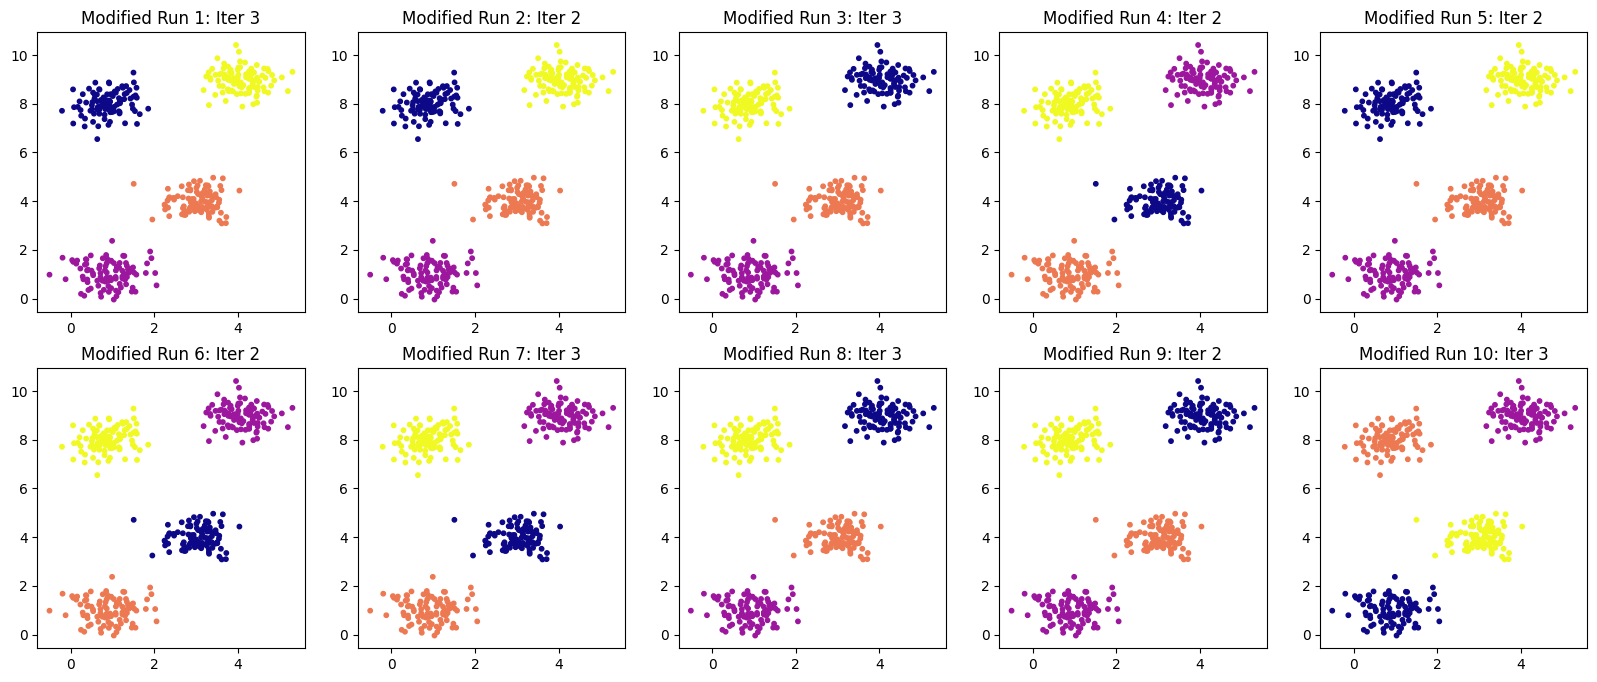

In [34]:
iterations_modified = []
convergence_runs_modified = []
centroids_modified = []

def farthest_centroid_initialization(X, k):
    centroids = []
    centroids.append(X[np.random.choice(X.shape[0])]) 
    for _ in range(1, k):
        distances = np.min([np.linalg.norm(X - c, axis=1) for c in centroids], axis=0)
        centroids.append(X[np.argmax(distances)])
    return np.array(centroids)

for run in range(10):
    farthest_centroids = farthest_centroid_initialization(X, 4)
    kmeans = KMeans(n_clusters=4, init=farthest_centroids, n_init=1, max_iter=16, random_state=run)
    kmeans.fit(X)
    iterations_modified.append(kmeans.n_iter_)
    convergence_runs_modified.append((run + 1, kmeans.n_iter_))
    centroids_modified.append(kmeans.cluster_centers_)

print("\nModified Initialization Convergence Details:")
for run, iteration in convergence_runs_modified:
    print(f"Run {run}: Converged in {iteration} iterations")
print("Modified Code Average Iterations:", np.mean(iterations_modified))

# Plot of Modified Code Clusters
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()
for i, (run, iteration) in enumerate(convergence_runs_modified):
    farthest_centroids = farthest_centroid_initialization(X, 4)
    kmeans = KMeans(n_clusters=4, init=farthest_centroids, n_init=1, max_iter=iteration, random_state=run)
    kmeans.fit(X)
    labels = kmeans.labels_
    ax = axes[i]
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', s=10)
    ax.set_title(f'Modified Run {run}: Iter {iteration}')

centroids_modified = np.array(centroids_modified)
np.save('centroids_modified.npy', centroids_modified)  # Save as a NumPy array file
print("\nCentroids have been saved to 'centroids_modified.npy'")
print("\nModified Centroids for each run:")
for i, centroids in enumerate(centroids_modified):
    print(f"Run {i + 1} Centroids:\n{centroids}")

### k-Means on Handwritten Digit Recognition Data
We can use k-means on the handwritten digits data set

In [28]:
mat = loadmat("C:\\Users\\amuly\\Downloads\\ML\\Bonus\\Bonus\\mnist_all.mat")
alltraindata = mat.get('train0')
for i in range(1,10):
    m = mat.get('train'+str(i))
    alltraindata = np.vstack((alltraindata,m))
alltraindata = np.array(alltraindata,dtype=float)
X = scale(alltraindata)

In [29]:
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
s = np.random.permutation(X.shape[0])
kmeans.fit(X[s[0:10000],:])
#kmeans.fit(X)


C:\Users\amuly\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\amuly\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^

KMeans(n_clusters=10, n_init=10)

In [41]:
kmeans.labels_.shape

(10000,)

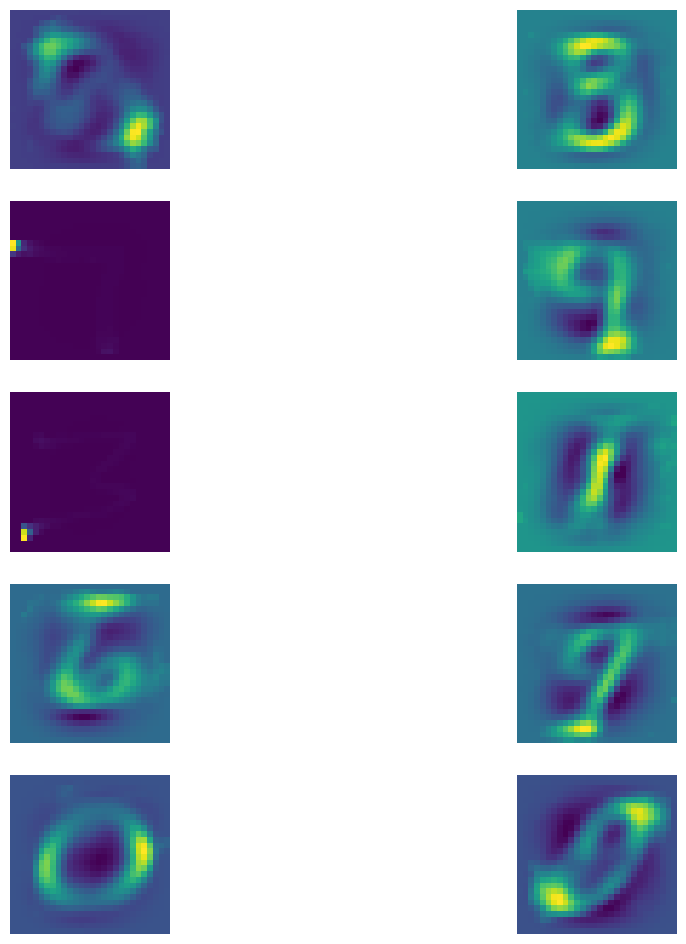

In [42]:
#plot the centroids
fig = plt.figure(figsize=(12,12))
for i in range(10):
    plt.subplot(5,2,i+1)
    row = kmeans.cluster_centers_[i,:]
    # note that each row is a flattened image
    # we first reshape it to a 28x28 matrix
    plt.imshow(np.reshape(row,((28,28))))
    plt.axis('off')